#### Problem statement
Clustering: Hierarchical

Dataset : hitters.csv

Apply Data pre-processing (Label Encoding , Data
Transformation....) techniques if necessary.

Apply Hierarchical clustering algorithms (based on CRuns column) to
find the group of players.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../all_datasets/K-Means & Hirarchical Clustering/Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [7]:
data = df[['CRuns']]
data

,CRuns
0,30
1,321
2,224
3,828
4,48
...,...
317,379
318,897
319,217
320,470


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
scaled_data = sc.fit_transform(data)

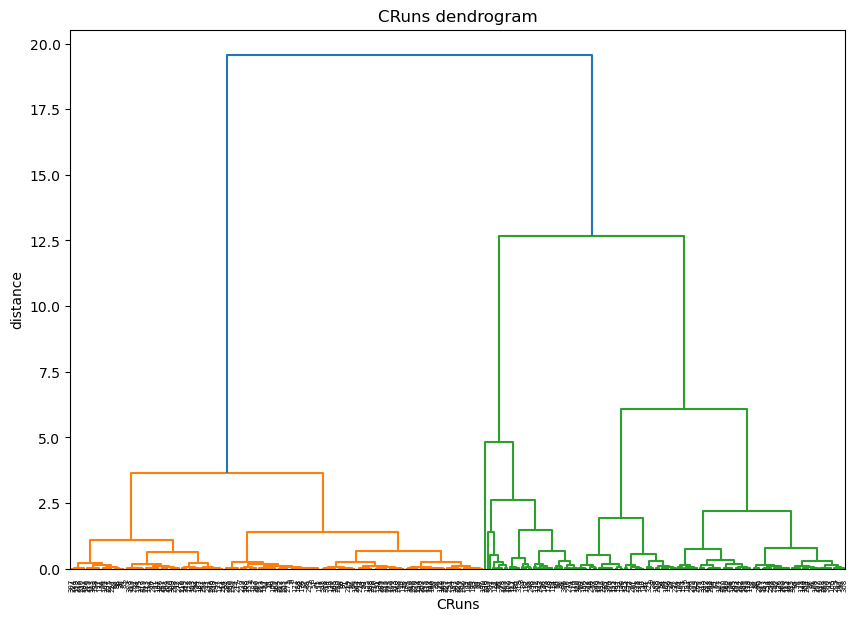

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("CRuns dendrogram")
plt.xlabel("CRuns")
plt.ylabel("distance")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

From above dendrogram it is clear that we can have 3 clusters

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(scaled_data)

Text(0.5, 1.0, 'Agglomerative Clustering')

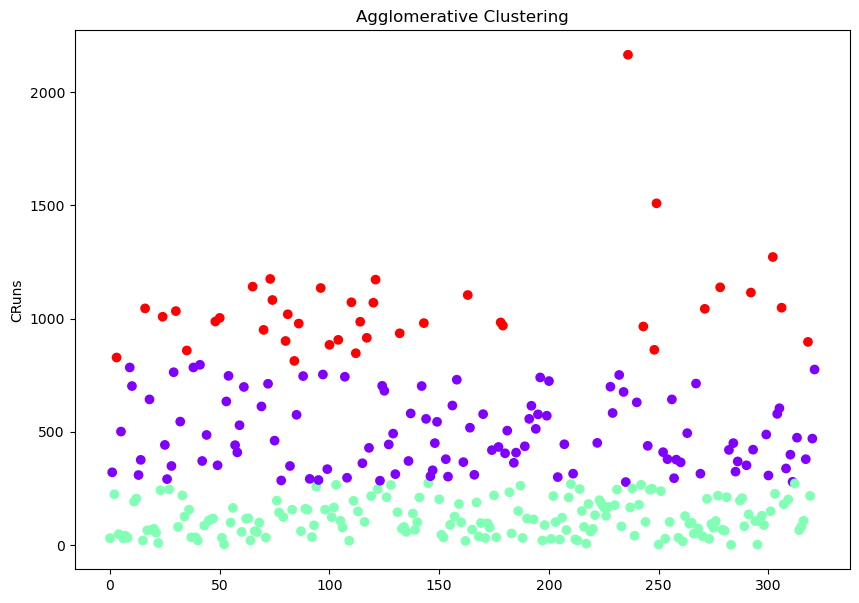

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(  data.index, data, c=cluster.labels_, cmap='rainbow')
plt.xlabel('')
plt.ylabel('CRuns')
plt.title('Agglomerative Clustering')